In [19]:
###fit the regression 
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import math
from matplotlib import pyplot as plt
%matplotlib inline

filepath = "/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/code/"

In [26]:
##given performance in the previous page, where should I post next?
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import linear_model
clf = linear_model.LinearRegression()
print("LINEAR REGRESSION!")

# from sklearn.tree import DecisionTreeRegressor
# clf = DecisionTreeRegressor(max_depth=10)
# print("TREE REGRESSION!")

# from sklearn.ensemble import AdaBoostClassifier
# clf =  AdaBoostClassifier()
# print("ADABOOST!")

# log_scaling = 0
log_scaling = 1

if log_scaling == 1:
    print("LOG SCALED!")
else:
    print("RAW COUNTS!")
# train_df = pd.read_csv(filepath + 'jan-jun-2017-videos-post-type-2-16.csv')
train_df = pd.read_csv(filepath + 'jan_to_jun16_2017_videos_type_2_16')
train_df = train_df.fillna(0)

# video_df.shape, video_df['external_id'].unique().shape
train_df = train_df.sort_values('firsthour_stats_date', ascending = False).drop_duplicates(subset=['external_id'], keep = 'last')

post_type = ['post_type_id']
one_hour_features = [
                'consumptions_by_type__link_clicks',
                'stories_by_action_type__share',
                'video_views_10s_organic',
                'video_complete_views_30s_organic',
                'video_complete_views_organic',
               ]
one_hour_features = ['firsthour_' + var for var in one_hour_features]

# train_features = one_hour_features
train_features = one_hour_features + post_type

if log_scaling == 1:
    for feats in (one_hour_features):
        train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

# train_df['10s_bucket'] = np.log(train_df['twodays_video_views_10s_organic'] + 1).astype(int)
# train_df['30s_bucket'] = np.log(train_df['twodays_video_complete_views_30s_organic'] + 1).astype(int)
# train_df['complete_views_bucket'] = np.log(train_df['twodays_video_complete_views_organic'] + 1).astype(int)

print("No. of data-points = ", len(train_df))

if log_scaling == 1:
    y_share = np.log(1+train_df['twodays_stories_by_action_type__share']).astype(int)
    y_clicks = np.log(1+train_df['twodays_consumptions_by_type__link_clicks']).astype(int)
else:
    y_share = train_df['twodays_stories_by_action_type__share']
    y_clicks = train_df['twodays_consumptions_by_type__link_clicks']

# y_10s = train_df['twodays_video_views_10s_organic']
# y_30s = train_df['twodays_video_complete_views_30s_organic']
# y_complete = train_df['twodays_video_complete_views_organic']
###
# y_10s = train_df['10s_bucket']
# y_30s = train_df['30s_bucket']
# y_complete = train_df['complete_views_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

accuracy_10s = []
error_10s = []
accuracy_30s = []
error_30s = []
accuracy_complete = []
error_complete = []

for train_index, test_index in kf.split(X):
    print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    accuracy_10s.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    error_10s.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    accuracy_30s.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    error_30s.append(error_percent)
    
    fold += 1
    
print("Share performance: Accuracy = ", np.mean(accuracy_10s), " ; Error (/100) = ", np.mean(error_10s))
print("Clicks performance: Accuracy = ", np.mean(accuracy_30s), " ; Error (/100) = ", np.mean(error_30s))

LINEAR REGRESSION!
LOG SCALED!
No. of data-points =  11082
Fold =  0
Fold =  1
Fold =  2
Fold =  3
Fold =  4
Fold =  5
Fold =  6
Fold =  7
Fold =  8
Fold =  9
Share performance: Accuracy =  0.93001608204  ; Error (/100) =  0.145965348395
Clicks performance: Accuracy =  0.747742063736  ; Error (/100) =  0.215670269456


In [27]:
print('Share performance')
res = ols(y = y_share, x = train_df[train_features])
print(res)

print('Clicks performance')
res = ols(y = y_clicks, x = train_df[train_features])
print(res)

Share performance

-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <firsthour_consumptions_by_type__link_clicks>
             + <firsthour_stories_by_action_type__share> + <firsthour_video_views_10s_organic>
             + <firsthour_video_complete_views_30s_organic>
             + <firsthour_video_complete_views_organic> + <post_type_id> + <intercept>

Number of Observations:         11082
Number of Degrees of Freedom:   7

R-squared:         0.9301
Adj R-squared:     0.9300

Rmse:              0.9184

F-stat (6, 11075): 24548.9152, p-value:     0.0000

Degrees of Freedom: model 6, resid 11075

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
firsthour_consumptions_by_type__link_clicks    -0.0801     0.0048     -16.74     0.0000    -0.0895    -0.07

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
##given performance in the previous page, where should I post next?
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# from sklearn import linear_model
# clf = linear_model.LinearRegression()
# print("LINEAR REGRESSION!")

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=5)
print("TREE REGRESSION!")

# from sklearn.ensemble import AdaBoostClassifier
# clf =  AdaBoostClassifier()
# print("ADABOOST!")

log_scaling = 0
# log_scaling = 1

if log_scaling == 1:
    print("LOG SCALED!")
else:
    print("RAW COUNTS!")

# train_df = pd.read_csv(filepath + 'jan-jun-2017-videos-post-type-2-16.csv')
train_df = pd.read_csv(filepath + 'jan_to_jun16_2017_videos_type_2_16')
train_df = train_df.fillna(0)

# video_df.shape, video_df['external_id'].unique().shape
train_df = train_df.sort_values('firsthour_stats_date', ascending = False).drop_duplicates(subset=['external_id'], keep = 'last')

post_type = ['post_type_id']
one_hour_features = [
                'consumptions_by_type__link_clicks',
                'stories_by_action_type__share',
                'video_views_10s_organic',
                'video_complete_views_30s_organic',
                'video_complete_views_organic',
               ]
one_hour_features = ['firsthour_' + var for var in one_hour_features]

# train_features = one_hour_features
train_features = one_hour_features + post_type

if log_scaling == 1:
    for feats in (one_hour_features):
        train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

# train_df['10s_bucket'] = np.log(train_df['twodays_video_views_10s_organic'] + 1).astype(int)
# train_df['30s_bucket'] = np.log(train_df['twodays_video_complete_views_30s_organic'] + 1).astype(int)
# train_df['complete_views_bucket'] = np.log(train_df['twodays_video_complete_views_organic'] + 1).astype(int)

print("No. of data-points = ", len(train_df))

if log_scaling == 1:
    y_share = np.log(1+train_df['twodays_stories_by_action_type__share']).astype(int)
    y_clicks = np.log(1+train_df['twodays_consumptions_by_type__link_clicks']).astype(int)
else:
    y_share = train_df['twodays_stories_by_action_type__share']
    y_clicks = train_df['twodays_consumptions_by_type__link_clicks']

# y_10s = train_df['twodays_video_views_10s_organic']
# y_30s = train_df['twodays_video_complete_views_30s_organic']
# y_complete = train_df['twodays_video_complete_views_organic']
###
# y_10s = train_df['10s_bucket']
# y_30s = train_df['30s_bucket']
# y_complete = train_df['complete_views_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

accuracy_10s = []
error_10s = []
accuracy_30s = []
error_30s = []
accuracy_complete = []
error_complete = []

for train_index, test_index in kf.split(X):
    print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    accuracy_10s.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    error_10s.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    accuracy_30s.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    error_30s.append(error_percent)
    
    fold += 1
    
print("Share performance: Accuracy = ", np.mean(accuracy_10s), " ; Error (/100) = ", np.mean(error_10s))
print("Clicks performance: Accuracy = ", np.mean(accuracy_30s), " ; Error (/100) = ", np.mean(error_30s))

TREE REGRESSION!
RAW COUNTS!
No. of data-points =  11082
Fold =  0
Fold =  1
Fold =  2
Fold =  3
Fold =  4
Fold =  5
Fold =  6
Fold =  7
Fold =  8
Fold =  9
Share performance: Accuracy =  0.646750732243  ; Error (/100) =  0.599088799495
Clicks performance: Accuracy =  0.804728135359  ; Error (/100) =  0.515155357999


In [23]:
print('Share performance')
res = ols(y = y_share, x = train_df[train_features])
print(res)

print('Clicks performance')
res = ols(y = y_clicks, x = train_df[train_features])
print(res)

Share performance

-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <firsthour_consumptions_by_type__link_clicks>
             + <firsthour_stories_by_action_type__share> + <firsthour_video_views_10s_organic>
             + <firsthour_video_complete_views_30s_organic>
             + <firsthour_video_complete_views_organic> + <post_type_id> + <intercept>

Number of Observations:         11082
Number of Degrees of Freedom:   7

R-squared:         0.1060
Adj R-squared:     0.1055

Rmse:          46103.4053

F-stat (6, 11075):   218.7418, p-value:     0.0000

Degrees of Freedom: model 6, resid 11075

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
firsthour_consumptions_by_type__link_clicks     1.3744     0.4839       2.84     0.0045     0.4259     2.32

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
train_df

,external_id,post_type_id,created_at,display_page,start_stats_date,firsthour_stats_date,firsthour_consumptions_by_type__link_clicks,firsthour_stories_by_action_type__share,firsthour_video_views_10s_organic,firsthour_video_complete_views_30s_organic,firsthour_video_complete_views_organic,twodays_stats_date,twodays_consumptions_by_type__link_clicks,twodays_stories_by_action_type__share,twodays_video_views_10s_organic,twodays_video_complete_views_30s_organic,twodays_video_complete_views_organic,content_id,title,validation_external_id
0,1318800798260799_2240508729423330,16,2017-06-12 18:00:08.314531,BuzzFeed Video,2017-06-12 18:05:10 UTC,2017-06-12 19:05:12 UTC,6.802395,0.000000,10.147179,9.617071,9.048997,2017-06-14 18:15:11 UTC,2501.0,1.0,278650,169489,98917,15791,This German Water Park Is INSANE,1318800798260799_2240508729423330
1,509565169222978_726756550837171,2,2017-06-12 18:00:38.130702,Bien Tasty,2017-06-12 18:05:10 UTC,2017-06-12 19:05:12 UTC,1.386294,8.716372,12.128851,11.924671,11.607399,2017-06-14 18:15:11 UTC,149.0,58067.0,1778850,1460514,1077307,18005,Pudín de pan con plátano,509565169222978_726756550837171
2,375093055847509_1482596015097202,2,2017-06-12 17:40:54.495306,BuzzFeed Sweaty,2017-06-12 17:45:09 UTC,2017-06-12 18:45:16 UTC,0.000000,4.110874,8.478244,7.401231,6.218600,2017-06-14 18:15:11 UTC,5.0,472.0,55358,20051,6745,19141,Friends Try Finishing One Of The World's Large...,375093055847509_1482596015097202
3,1272480059489124_1643574589046334,2,2017-06-12 17:27:17.540183,Goodful,2017-06-12 17:30:09 UTC,2017-06-12 18:30:08 UTC,6.915723,8.778634,12.142968,11.824051,9.817603,2017-06-14 18:15:13 UTC,19594.0,199186.0,5086545,3687128,507755,17620,Meal-Prep Chicken 5 Ways,1272480059489124_1643574589046334
4,195989344211258_253832761760249,2,2017-06-12 17:27:11.362914,Nifty Outdoors,2017-06-12 17:30:09 UTC,2017-06-12 18:30:08 UTC,0.693147,6.480045,11.154792,10.863680,9.651945,2017-06-14 18:15:13 UTC,5.0,1285.0,123217,99741,38150,19111,First Aid for Common Summer Injuries,195989344211258_253832761760249
5,537452496455998_676994869168426,2,2017-06-12 17:27:19.015950,BF PubHub Dev,2017-06-12 17:30:09 UTC,2017-06-12 18:30:07 UTC,0.000000,0.000000,0.000000,0.000000,0.000000,2017-06-14 18:15:13 UTC,0.0,0.0,0,0,0,-1,0,537452496455998_676994869168426
6,1466985283336295_1630963833605105,2,2017-06-12 17:27:17.534753,Bring Me,2017-06-12 17:30:09 UTC,2017-06-12 18:30:07 UTC,3.988984,4.418841,9.895909,9.464517,8.909370,2017-06-14 18:15:13 UTC,227.0,708.0,122353,80891,48741,15367,This woman invented the salted caramel (and th...,1466985283336295_1630963833605105
7,1318800798260799_2240454366095433,2,2017-06-12 17:00:35.551819,BuzzFeed Video,2017-06-12 17:05:12 UTC,2017-06-12 18:05:09 UTC,6.865891,3.951244,10.472941,10.026148,8.598773,2017-06-14 17:15:10 UTC,1900.0,197.0,229232,150787,36867,21306,Vegetarians Try Bacon-Flavored Products,1318800798260799_2240454366095433
8,1679616822293043_1888986744689382,2,2017-06-12 17:00:10.667283,Nifty,2017-06-12 17:00:17 UTC,2017-06-12 18:00:10 UTC,1.386294,7.755339,12.708123,12.291470,11.860006,2017-06-14 17:15:09 UTC,1709.0,26107.0,3112265,2063293,1370042,19118,4 Ways to Remove Stickers,1679616822293043_1888986744689382
9,21898300328_10156211274535329,16,2017-06-12 16:45:19.079533,BuzzFeed,2017-06-12 16:50:09 UTC,2017-06-12 17:50:10 UTC,6.342121,0.000000,10.782512,9.779567,0.000000,2017-06-14 17:15:10 UTC,2846.0,0.0,105547,39428,4,-1,0,21898300328_10156211274535329


In [11]:
train_df['display_page'].unique().shape

(121,)

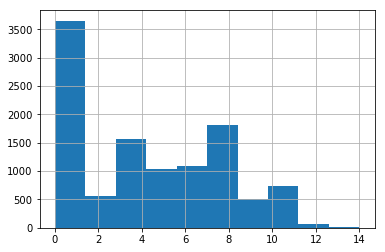

In [28]:
y_share.hist()

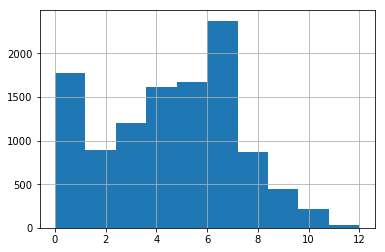

In [29]:
y_clicks.hist()